In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from acquire_g import get_zillow_data
from prepare import acquire_and_prep_data, fips_labels, zillow_split, add_scaled_columns

In [2]:
# plt rc sets defaults for matplotlib figures
plt.rc("font", size=13)
plt.rc("figure", figsize= (13,7))

In [3]:
# acquiring the prep data
df = acquire_and_prep_data()
df.head()

,sqft,bathroomcnt,bedroomcnt,zipcode,taxamount,taxvaluedollarcnt,yearbuilt,tax_rate,county
0,1000,0.0,0,97083,212.46,27400.0,2002,0.78,Ventura County
1,1604,2.0,4,96415,6089.82,498347.0,1950,1.22,Los Angeles County
2,2384,3.0,3,96452,6679.55,549917.0,1937,1.21,Los Angeles County
3,1574,2.0,3,97319,3876.31,235272.0,1990,1.65,Los Angeles County
4,1619,2.0,2,97329,4206.15,340000.0,1983,1.24,Los Angeles County


In [4]:
# Splitting data into train validate and split
train, validate, test = zillow_split(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')
train.head().T

train -> (10472, 9)
validate -> (4488, 9)
test -> (3741, 9)


,3757,11816,6883,13320,1642
sqft,1621,2448,1134,1794,3014
bathroomcnt,2,3,2,3,2
bedroomcnt,3,4,4,3,3
zipcode,96325,96954,96524,96387,96403
taxamount,3062.49,14201,2014.56,6504.86,7916.7
taxvaluedollarcnt,273285,1.03074e+06,152322,537067,717821
yearbuilt,1980,2014,1953,1982,1948
tax_rate,1.12,1.38,1.32,1.21,1.1
county,Los Angeles County,Orange County,Los Angeles County,Los Angeles County,Los Angeles County


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10472 entries, 3757 to 2095
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sqft               10472 non-null  int64  
 1   bathroomcnt        10472 non-null  float64
 2   bedroomcnt         10472 non-null  int64  
 3   zipcode            10472 non-null  int64  
 4   taxamount          10472 non-null  float64
 5   taxvaluedollarcnt  10472 non-null  float64
 6   yearbuilt          10472 non-null  int64  
 7   tax_rate           10472 non-null  float64
 8   county             10472 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 818.1+ KB


In [6]:
train.describe()

,sqft,bathroomcnt,bedroomcnt,zipcode,taxamount,taxvaluedollarcnt,yearbuilt,tax_rate
count,10472.000000,10472.000000,10472.000000,10472.000000,10472.000000,1.047200e+04,10472.000000,10472.000000
mean,1653.385122,2.119223,3.007448,96506.103514,4902.712172,3.972259e+05,1961.958174,1.325755
std,708.240360,0.795898,0.916608,4208.336228,4829.282965,4.139204e+05,22.756839,0.351721
min,171.000000,0.000000,0.000000,95982.000000,82.720000,7.106000e+03,1880.000000,0.030000
25%,1172.000000,2.000000,2.000000,96151.000000,2436.692500,1.801395e+05,1949.000000,1.190000
50%,1491.000000,2.000000,3.000000,96341.000000,3852.340000,3.058775e+05,1959.000000,1.240000
75%,1960.250000,3.000000,4.000000,96533.000000,5923.420000,4.862482e+05,1979.000000,1.360000
max,9200.000000,4.500000,5.000000,399675.000000,176576.490000,1.472112e+07,2015.000000,13.090000


In [7]:
# Most common types of homes have 1-5 bedrooms. Have a few with 0
train.bedroomcnt.value_counts()

3    4575
2    2547
4    2458
5     499
1     348
0      45
Name: bedroomcnt, dtype: int64

In [8]:
# Most common bathrooms are 1-4
train.bathroomcnt.value_counts()

2.0    4750
3.0    2307
1.0    2199
2.5     566
4.0     344
1.5     118
3.5      93
4.5      62
0.0      33
Name: bathroomcnt, dtype: int64

In [9]:
train.zipcode.value_counts()

96193    110
96368     97
96361     93
97319     84
97328     79
        ... 
96039      1
97108      1
95995      1
97119      1
96329      1
Name: zipcode, Length: 380, dtype: int64

In [10]:
train.sqft.value_counts()

1200    32
1400    27
1080    26
1212    21
1210    20
        ..
1821     1
2891     1
1837     1
2859     1
2135     1
Name: sqft, Length: 2645, dtype: int64

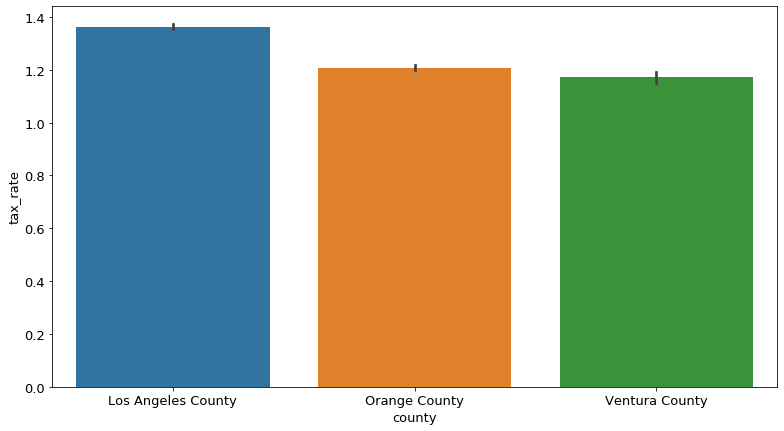

In [11]:
# Shows the tax rate per county. IS THIS THE AVG?
sns.barplot(data=train, y='tax_rate', x='county')

(0, 6)

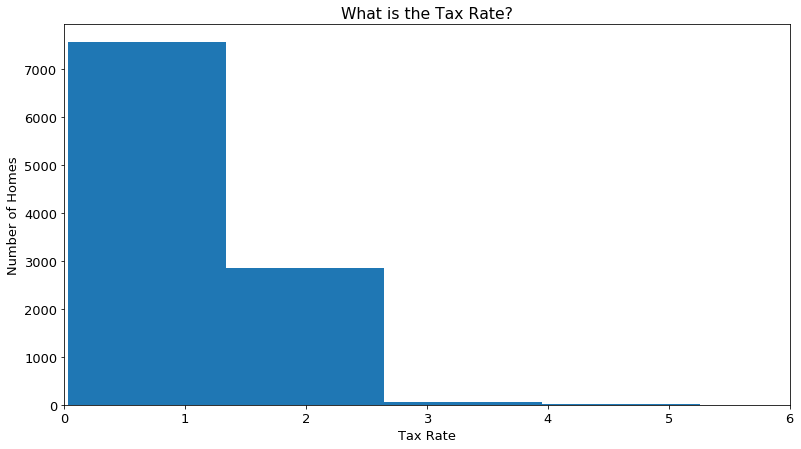

In [12]:
# Majority of homes have a tax rate from 0-1%
plt.hist(train.tax_rate)
plt.xlabel('Tax Rate')
plt.ylabel('Number of Homes')
plt.title('What is the Tax Rate?')
plt.xlim(0,6)

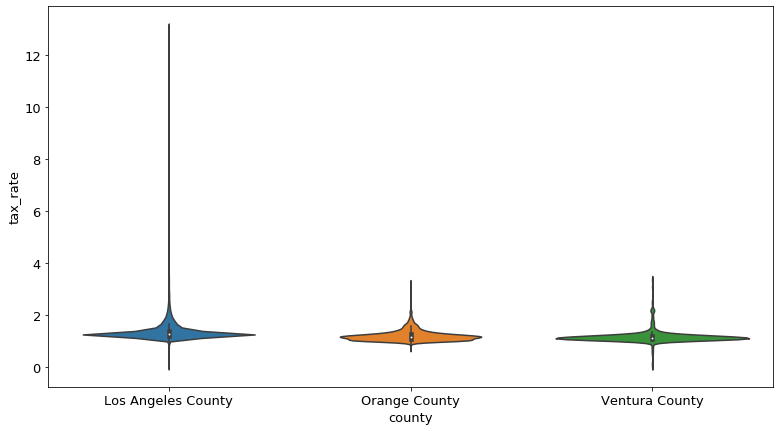

In [13]:
sns.violinplot(data=train, y='tax_rate', x='county')

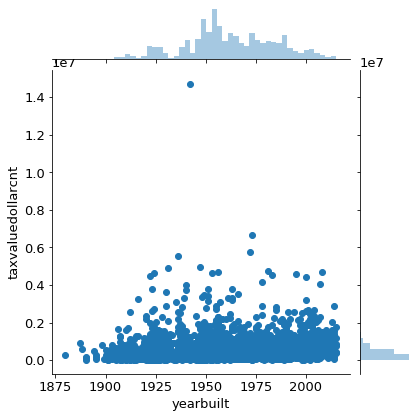

In [14]:
sns.jointplot(x='yearbuilt', y='taxvaluedollarcnt', data=train)

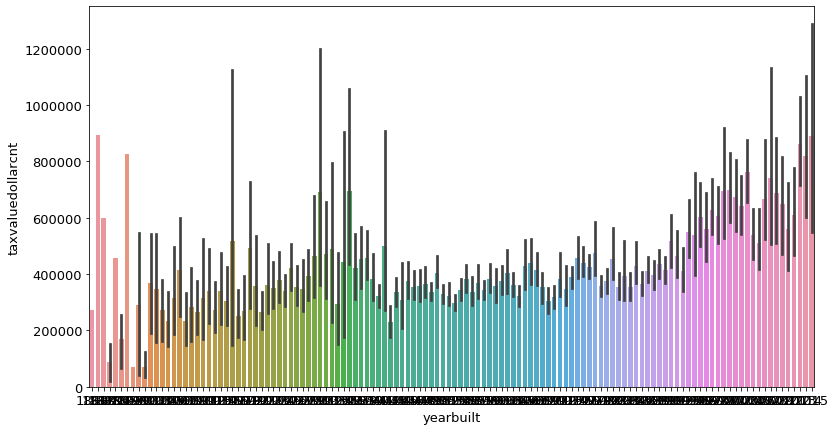

In [15]:
# Shows that newer homes seem to have a higher home value
sns.barplot(x='yearbuilt', y='taxvaluedollarcnt', data=train)

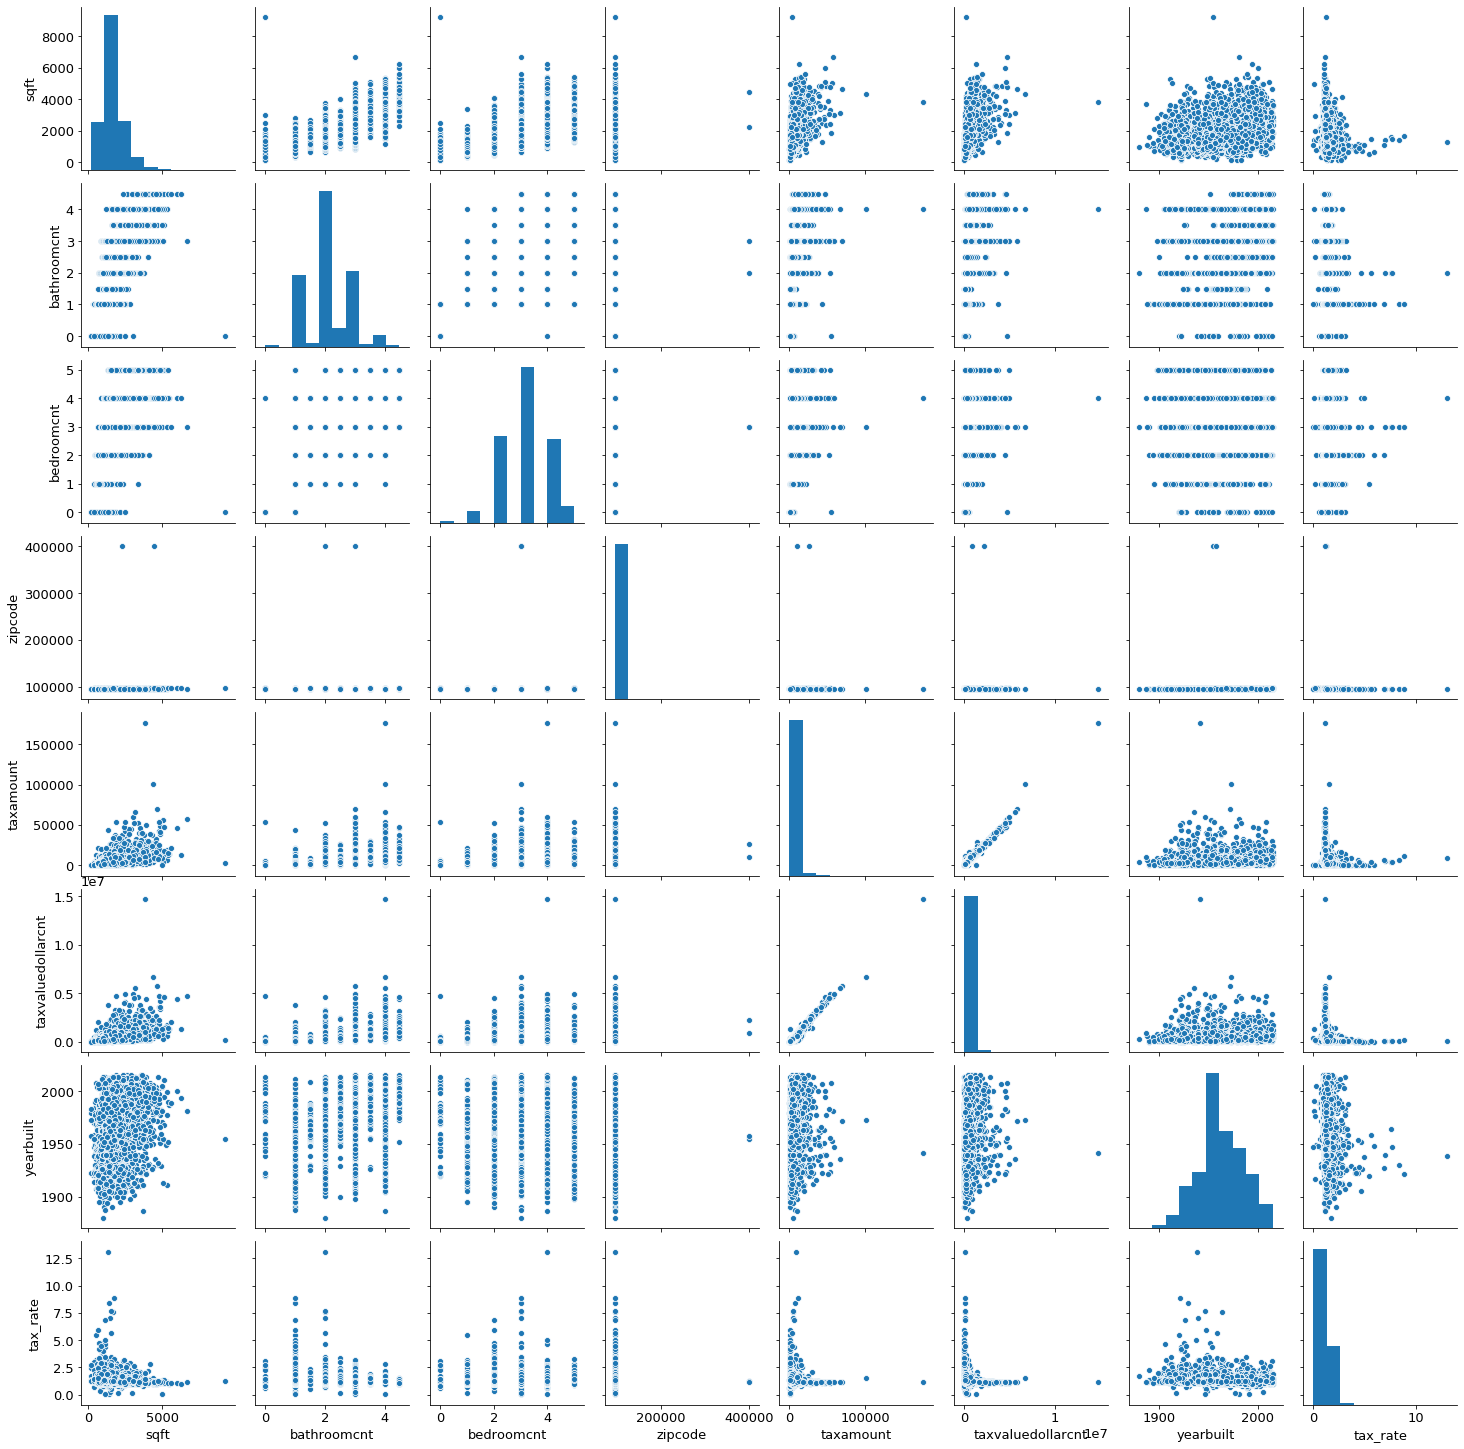

In [16]:
sns.pairplot(train)

In [ ]:
g = sns.PairGrid(train)
# we can specify any two functions we want for visualization
g.map_diag(sns.distplot) # one for a single variable
g.map_offdiag(sns.regplot) # one for the interaction of two variables

In [ ]:
sns.heatmap(train.corr(), cmap='Reds', annot=True)

In [ ]:
# sqft, bathrromcnt, and bedroomcnt have the bet correlation
train.corr()

In [ ]:
sns.boxplot(data=train, y='taxvaluedollarcnt', x='bedroomcnt')

In [ ]:
sns.boxplot(data=train, y='taxvaluedollarcnt', x='bathroomcnt')

In [ ]:
train.county.value_counts().sort_index().plot.bar()
plt.title('County Distribution')
plt.ylabel('# of Homes')
plt.xticks(rotation=0)

In [ ]:
sns.distplot(train[train.county == 'Los Angeles County'].taxvaluedollarcnt)

In [ ]:
sns.distplot(train[train.county == 'Orange County'].taxvaluedollarcnt)

In [ ]:
sns.distplot(train[train.county == 'Ventura County'].taxvaluedollarcnt)

In [ ]:
!git status

In [ ]:
!git add -A

In [ ]:
!git commit -m "Adding explore and wrangle"

In [ ]:
!git push

In [ ]:
!git pull